In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

precdata = session.query(Measurement.date, func.sum(Measurement.prcp)).\
group_by(Measurement.date).order_by(Measurement.id.desc()).limit(365).all()
precdata

[('2017-08-23', 0.53),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.5800000000000001),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.19),
 ('2017-08-16', 0.61),
 ('2017-08-15', 0.8200000000000001),
 ('2017-08-14', 0.31),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.07),
 ('2017-08-09', 0.15),
 ('2017-08-08', 0.44000000000000006),
 ('2017-08-07', 0.05),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.06),
 ('2017-08-03', 0.06999999999999999),
 ('2017-08-02', 0.3),
 ('2017-08-01', 0.13999999999999999),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.3),
 ('2017-07-29', 0.61),
 ('2017-07-28', 0.77),
 ('2017-07-27', 0.01),
 ('2017-07-26', 0.5),
 ('2017-07-25', 0.61),
 ('2017-07-24', 3.2699999999999996),
 ('2017-07-23', 1.1300000000000001),
 ('2017-07-22', 4.42),
 ('2017-07-21', 0.13),
 ('2017-07-20', 1.24),
 ('2017-07-19', 0.41000000000000003),
 ('2017-07-18', 2.53),
 ('2017-07-17', 0.91),
 ('2017-07-16', 0.81),
 ('2017-07-15', 0.

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date newest to oldest

precdata_df = pd.DataFrame(precdata, columns=['Date', 'Precipitation'])
precdata_df = precdata_df.sort_index(ascending=False)
precdata_df = precdata_df.reset_index()
precdata_df = precdata_df.drop("index", 1)
precdata_df = precdata_df.set_index('Date')
precdata_df.head()

,Precipitation
Date,
2016-08-07,3.34
2016-08-08,0.66
2016-08-09,0.59
2016-08-10,0.00
2016-08-11,0.09


In [12]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(precdata_df)

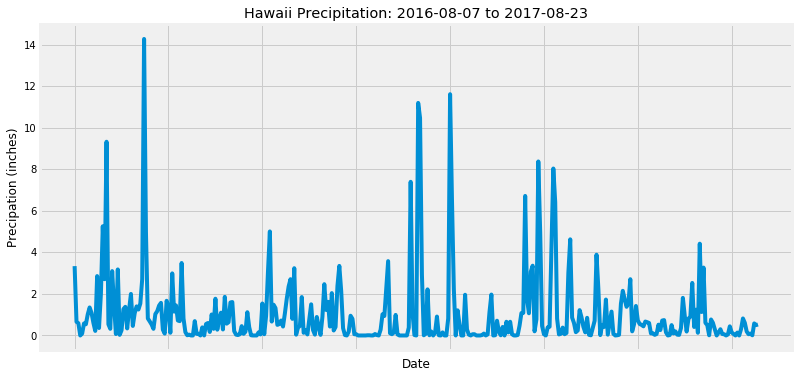

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
precdata_df.plot(figsize = (12, 6), rot = 45, use_index = True, legend=False)
plt.ylabel('Precipation (inches)')
plt.xlabel('Date')
plt.title("Hawaii Precipitation: %s to %s" % (precdata_df.index.min(),precdata_df.index.max()))
plt.savefig("Output/Hawaii_PrecData")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precdata_df.describe()

,Precipitation
count,365.000000
mean,1.026795
std,1.794630
min,0.000000
25%,0.060000
50%,0.440000
75%,1.150000
max,14.280000


In [15]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).count()
print(f'There are {stations} stations in this dataset.')

There are 9 stations in this dataset.


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activeStations = session.query(Measurement.station,func.count(Measurement.station)). \
                 group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
        
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
mostactive = "USC00519281"

topstation = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.id.desc()). \
    filter(Measurement.station == mostactive).limit(365).all()

temps_df = pd.DataFrame(topstation, columns=["Date", "Temps"])
temps_df.head()

,Date,Temps
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


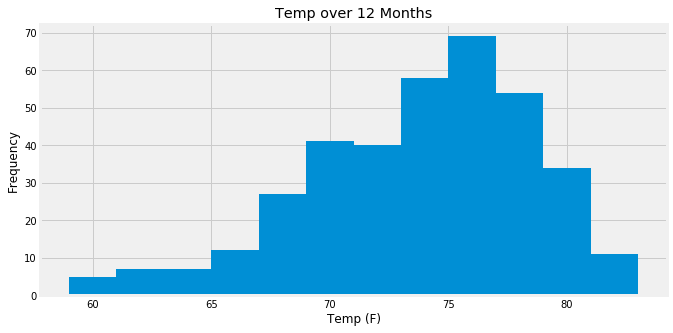

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize = (10, 5))
plt.hist(temps_df["Temps"], bins=12)
plt.grid
plt.ylabel("Frequency")
plt.xlabel("Temp (F)")
plt.title("Temp over 12 Months")
plt.savefig("Output/Hawaii_TempHist")
plt.show()

In [20]:
#display(temps_df)

In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
results = calc_temps('2016-08-10', '2017-08-18')
results

[(58.0, 74.68205574912892, 87.0)]

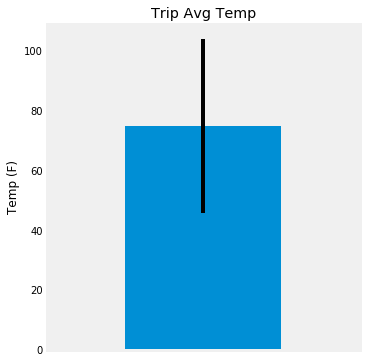

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df = pd.DataFrame(results, columns=['Min', 'Avg', 'Max'])
avg_temp = trip_df['Avg']
min_max_temp = trip_df.iloc[0]['Max'] - trip_df.iloc[0]['Min']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(5,6))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("Output/Hawaii_tripsum.png")
plt.show()

In [23]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
